In [1]:
!pip install numpy 
!pip install pandas
!pip install matplotlib.pyplot

You should consider upgrading via the 'C:\Users\facki\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\facki\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.
ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot
You should consider upgrading via the 'C:\Users\facki\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("Data/clientes (1).csv", index_col="ID_Cliente")
df

,Nombre,Edad,Genero,Ciudad,Compras,Gasto_Total
ID_Cliente,,,,,,
101,Ana,25.0,F,Santiago,5,250000
102,Luis,34.0,M,Valpo,3,180000
103,Pedro,NaN,M,Concepcion,2,95000
104,Valentina,28.0,F,Santiago,4,220000
105,Camila,45.0,F,Puerto Montt,8,400000
106,Jorge,38.0,M,Valpo,1,60000
107,Fernanda,29.0,F,Concepcion,3,175000
107,Fernanda,29.0,F,Concepcion,3,175000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 101 to 107
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nombre       8 non-null      object 
 1   Edad         7 non-null      float64
 2   Genero       8 non-null      object 
 3   Ciudad       8 non-null      object 
 4   Compras      8 non-null      int64  
 5   Gasto_Total  8 non-null      int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 448.0+ bytes


In [9]:
columnas_nulas = df.isnull().any()
columnas_nulas

Nombre         False
Edad            True
Genero         False
Ciudad         False
Compras        False
Gasto_Total    False
dtype: bool

In [12]:
datos_sin_nulos = df.dropna()
datos_sin_nulos

,Nombre,Edad,Genero,Ciudad,Compras,Gasto_Total
ID_Cliente,,,,,,
101,Ana,25.0,F,Santiago,5,250000
102,Luis,34.0,M,Valpo,3,180000
104,Valentina,28.0,F,Santiago,4,220000
105,Camila,45.0,F,Puerto Montt,8,400000
106,Jorge,38.0,M,Valpo,1,60000
107,Fernanda,29.0,F,Concepcion,3,175000
107,Fernanda,29.0,F,Concepcion,3,175000


In [13]:
duplicados = df.duplicated().sum() #Comando para eliminar duplicados
if duplicados > 0:
    print(f'Se encontraron {duplicados} filas duplicadas. Procediendo a eliminarlas')
    df.drop_duplicates(inplace=True)
else:
    print('No se encontraron filas duplicadas. No es necesario eliminarlas')

print('Dimensiones tras el paso de duplicados')

Se encontraron 1 filas duplicadas. Procediendo a eliminarlas
Dimensiones tras el paso de duplicados


In [19]:
clientes_mas_de_3_compras = df[df["Compras"] > 3]
clientes_mas_de_3_compras


,Nombre,Edad,Genero,Ciudad,Compras,Gasto_Total
ID_Cliente,,,,,,
101,Ana,25.0,F,Santiago,5,250000
104,Valentina,28.0,F,Santiago,4,220000
105,Camila,45.0,F,Puerto Montt,8,400000


In [20]:
clientes_por_ciudad = df["Ciudad"].value_counts()
print(clientes_por_ciudad)


Ciudad
Santiago        2
Valpo           2
Concepcion      2
Puerto Montt    1
Name: count, dtype: int64


In [24]:
grafico = datos_sin_nulos
grafico

,Nombre,Edad,Genero,Ciudad,Compras,Gasto_Total
ID_Cliente,,,,,,
101,Ana,25.0,F,Santiago,5,250000
102,Luis,34.0,M,Valpo,3,180000
104,Valentina,28.0,F,Santiago,4,220000
105,Camila,45.0,F,Puerto Montt,8,400000
106,Jorge,38.0,M,Valpo,1,60000
107,Fernanda,29.0,F,Concepcion,3,175000
107,Fernanda,29.0,F,Concepcion,3,175000


In [27]:
df_limpio = df.drop_duplicates().dropna()
df_limpio

,Nombre,Edad,Genero,Ciudad,Compras,Gasto_Total
ID_Cliente,,,,,,
101,Ana,25.0,F,Santiago,5,250000
102,Luis,34.0,M,Valpo,3,180000
104,Valentina,28.0,F,Santiago,4,220000
105,Camila,45.0,F,Puerto Montt,8,400000
106,Jorge,38.0,M,Valpo,1,60000
107,Fernanda,29.0,F,Concepcion,3,175000


Text(0, 0.5, 'Gastos')

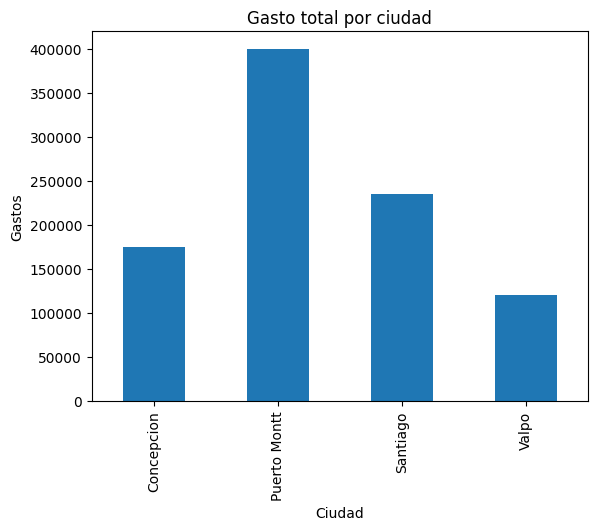

In [35]:
gasto_promedio = df_limpio.groupby("Ciudad")["Gasto_Total"].mean()

gasto_promedio.plot(kind="bar")
plt.title("Gasto total por ciudad")
plt.xlabel("Ciudad")
plt.ylabel("Gastos")